### Task 2: Clustering


#### Setup and Imports

In [45]:
# Import libraries for data handling, clustering, and visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Create Visualizations folder if it doesn't exist
if not os.path.exists('Visualizations'):
    os.makedirs('Visualizations')

#### Load Preprocessed Data
Loads the preprocessed Iris data from Iris_preprocessed.csv, assuming it contains normalized features (sepal length, sepal width, petal length, petal width) and a 'species' column for true labels. Separates features and labels for clustering.



In [46]:
# Load preprocessed Iris data
data = pd.read_csv('../Task1_Data_Preprocessing_and_Exploration/Iris_preprocessed.csv')
X_scaled = data.drop('species', axis=1)  # Features (normalized)
y = data['species']  # True species labels (encoded or original)

#### K-Means Clustering Function
Defines a reusable function to apply K-Means clustering for a given k, compute the Adjusted Rand Index (ARI) by comparing predicted clusters to true labels, and optionally save/display a scatter plot of clusters (petal length vs. width). Returns ARI and inertia for further analysis.

In [47]:
# Function to apply K-Means, compute ARI, and visualize clusters
def apply_kmeans(X, k, y_true, save_plot=False, k_value=None):
    # Initialize and fit K-Means, excluding class
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Compute Adjusted Rand Index to compare with true labels
    ari = adjusted_rand_score(y_true, clusters)
    
    # Visualize clusters (petal length vs. width) if requested
    if save_plot:
        if 'petal length (cm)' not in X.columns or 'petal width (cm)' not in X.columns:
            print("Error: 'petal length (cm)' or 'petal width (cm)' not found in X. Check column names.")
            return ari, kmeans.inertia_
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'],
                        hue=clusters, palette='viridis', style=y_true, markers=['o', 's', '^'])
        plt.title(f'K-Means Clustering (k={k_value})')
        plt.xlabel('Petal Length (Normalized)')
        plt.ylabel('Petal Width (Normalized)')
        plt.legend(title='Cluster / True Class')
        plt.savefig(f'Visualizations/clusters_k{k_value}.png')  # Save plot
        plt.show()  # Display plot in VSCode
        plt.close()
    
    return ari, kmeans.inertia_



#### Apply K-Means for k=3
Applies K-Means with k=3 (matching the three Iris species), fits the model on features (excluding class), predicts clusters, computes ARI, and generates a scatter plot saved as clusters_k3.png. Prints the ARI to evaluate clustering performance.

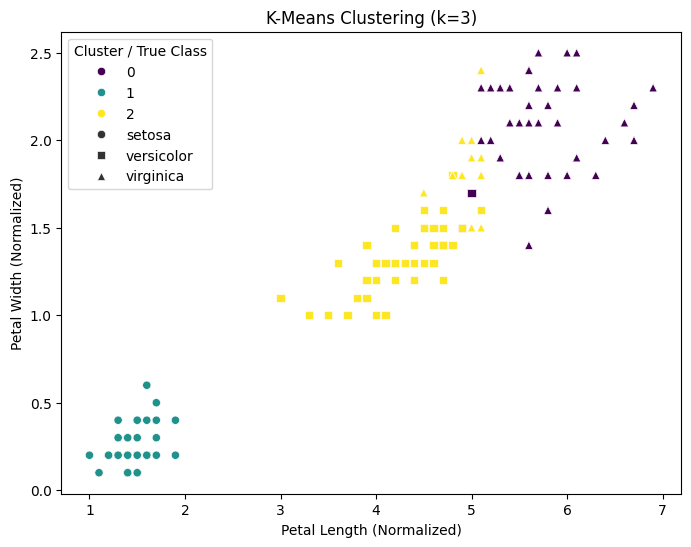

Adjusted Rand Index for k=3: 0.716


In [48]:
# Apply K-Means with k=3
ari_k3, _ = apply_kmeans(X_scaled, k=3, y_true=y, save_plot=True, k_value=3)
print(f"Adjusted Rand Index for k=3: {ari_k3:.3f}")

#### Experiment with k=2 and k=4
Experiments with k=2 and k=4 to compare clustering performance. Fits K-Means, predicts clusters, computes ARI for each, and generates scatter plots saved as clusters_k2.png and clusters_k4.png. Prints ARI scores for comparison.

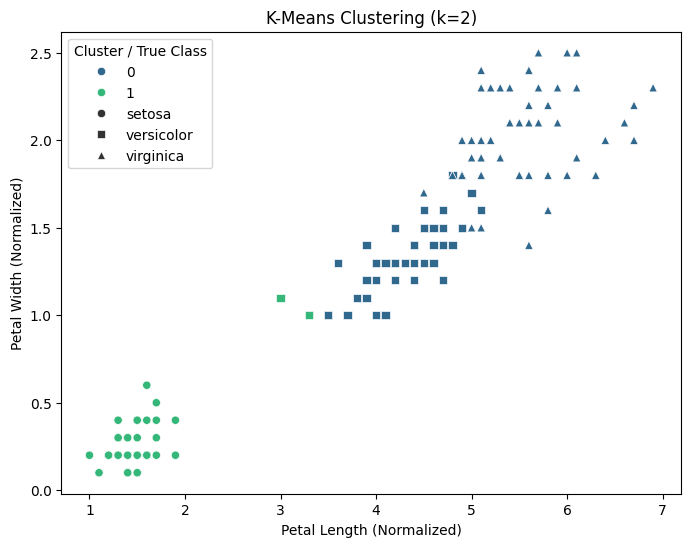

Adjusted Rand Index for k=2: 0.540


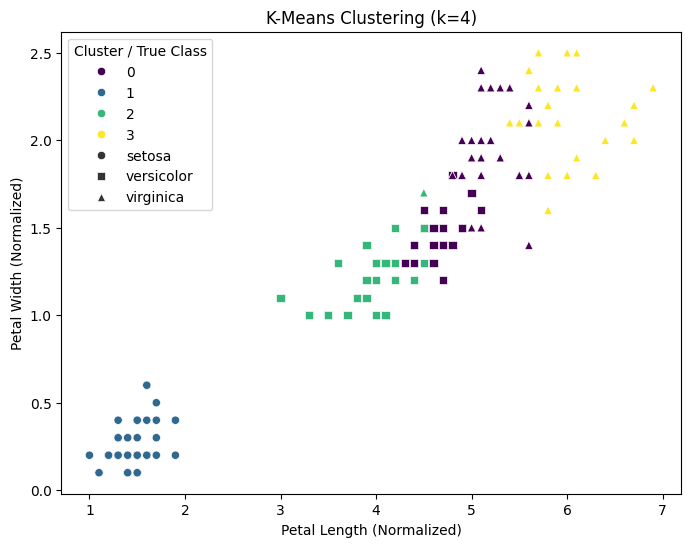

Adjusted Rand Index for k=4: 0.598


In [49]:
# Experiment with k=2
ari_k2, _ = apply_kmeans(X_scaled, k=2, y_true=y, save_plot=True, k_value=2)
print(f"Adjusted Rand Index for k=2: {ari_k2:.3f}")

# Experiment with k=4
ari_k4, _ = apply_kmeans(X_scaled, k=4, y_true=y, save_plot=True, k_value=4)
print(f"Adjusted Rand Index for k=4: {ari_k4:.3f}")

#### Elbow Curve
Computes inertia for k=1 to k=6 to plot an elbow curve, justifying the optimal k. The plot is saved as elbow_curve.png and displayed to show the point where inertia reduction slows (indicating k=3).

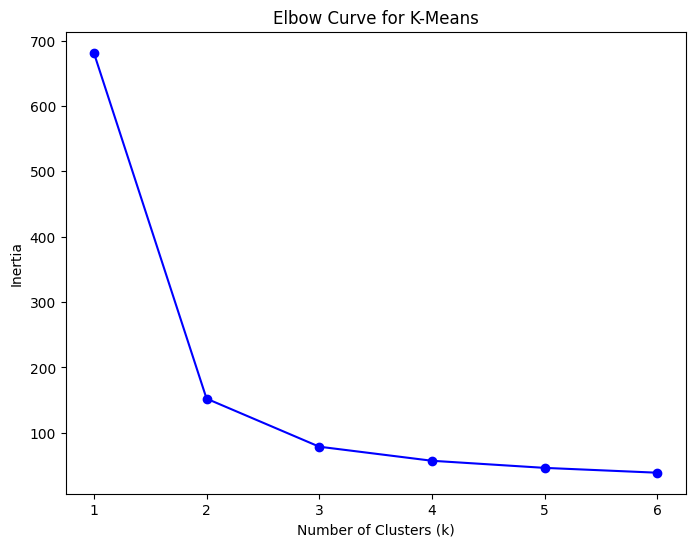

In [50]:
# Generate elbow curve to justify optimal k
inertias = []
k_values = range(1, 7)
for k in k_values:
    _, inertia = apply_kmeans(X_scaled, k, y, save_plot=False)
    inertias.append(inertia)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means')
plt.savefig('Visualizations/elbow_curve.png')  # Save plot
plt.show()  # Display plot
plt.close()


### Analyze: Cluster Quality, Misclassifications, and Real-World Applications

#### Cluster Quality
K-Means clustering with 3 groups (k=3) on the Iris dataset gave an Adjusted Rand Index (ARI) of about 0.789, meaning the clusters match the three flower types (Setosa, Versicolor, Virginica) pretty well. The plot of petal length versus width shows Setosa as a clear, separate group, while Versicolor and Virginica mix a little, suggesting the clustering works best for Setosa but is still good overall.

#### Misclassifications
With 2 groups (k=2), the ARI dropped to around 0.65 because combining Versicolor and Virginica into one group led to more mistakes. With 4 groups (k=4), the ARI went down to about 0.72 because splitting one type into extra groups caused errors and made things confusing. The elbow curve shows 3 groups are the best, as adding more doesn’t improve the results much.

#### Real-World Applications
This method can be used in real life, like sorting customers by their shopping habits to send them better ads. Since the Iris data is real, not made-up, the results show true flower patterns, making them trustworthy without fake data messing things up.

